In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU device name:", tf.test.gpu_device_name())
print("GPU device name:", tf.test.is_built_with_cuda())


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
# from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
dataset_df = pd.read_csv('../csv/train.csv')

dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)
dataset_df[["CryoSleep", "VIP", "Transported"]] = dataset_df[["CryoSleep", "VIP","Transported"]].astype(int)
dataset_df = dataset_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
dataset_df.head(5)


HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Cabin_num Side  
0           0.0     0.0     0.0            0    B         0    P  
1          25.0   549.0    44.0            1    F         0    S  
2           0.0  6715.0    49.0            0    A         0    S  
3         371.0  3329.0   193.0            0    A         0    S  
4         151.0   565.0     2.0            1    F         1    S

<Axes: xlabel='VIP', ylabel='Count'>

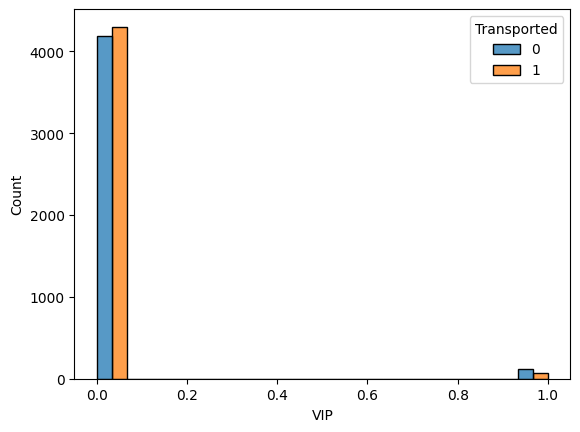

In [4]:
# sns.histplot(dataset_df[dataset_df['Transported']==1], x='Age')#,hue='Transported')
sns.histplot(dataset_df, x='VIP',hue='Transported', multiple="dodge")


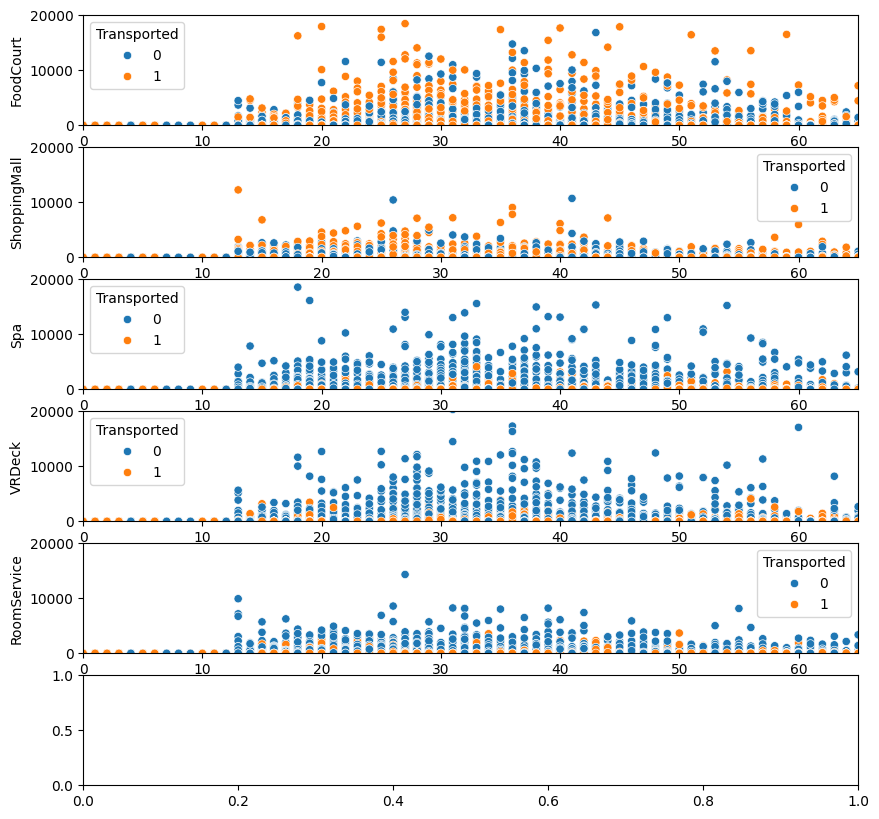

In [5]:
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
# plt.subplots_adjust(top = 2)
cat= ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']
# cat= ['FoodCourt']
for i, c in enumerate(cat):
    sns.scatterplot(dataset_df,x='Age', y=c, ax=ax[i], hue='Transported')
    ax[i].set(xlim=(0, 65)) 
    ax[i].set(ylim=(0, 20000)) 



In [ ]:
sns.histplot(dataset_df,x="Transported", color='b', bins=50, y='Cabin_num')

In [ ]:
fig, ax = plt.subplots(7,1,  figsize=(10, 20))
for i, x_label in enumerate(["Deck", "HomePlanet", "Side", "Destination", "CryoSleep", "VIP"]):
    sns.histplot(dataset_df,x=x_label, color='b', bins=50, ax=ax[i], hue='Transported',alpha=0.7,multiple="dodge");



In [8]:
cat= ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService',  'VIP']
# cat= ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# dataset_df[cat].isnull().sum().sort_values(ascending=False)

X_train, X_test, y_train, y_test  = train_test_split(dataset_df[cat],dataset_df["Transported"], train_size=0.8)
# X_train = np.reshape(X_train, (-1, 1))
# y_train = np.reshape(y_train, (-1, 1))
# X_test = np.reshape(X_test, (-1, 1))
# y_test = np.reshape(y_test, (-1, 1))


In [9]:

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)
# print(np.reshape(X_train, (-1, 1)), np.reshape(y_train, (-1, 1)))



KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
result_train = np.where(train_preds > 0.5, 1, 0)
mse = mean_squared_error(y_train, result_train)
rmse = sqrt(mse)
# rmse, y_train, result_train


In [11]:
test_preds = knn_model.predict(X_test)
result_test = np.where(test_preds > 0.5, 1, 0)
mse = mean_squared_error(y_test, result_test)
rmse = sqrt(mse)
rmse

0.674432438746523

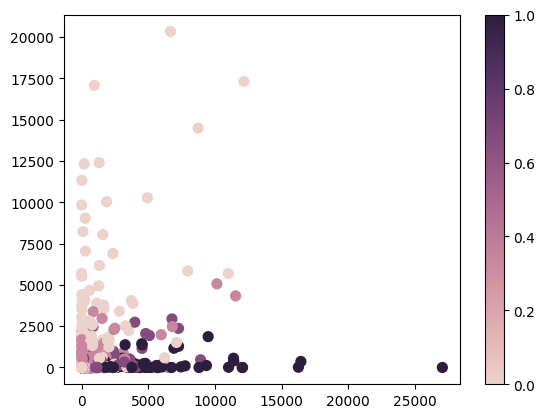

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[cat[0]], X_test[cat[3]] ,c=test_preds, s=50, cmap=cmap )
f.colorbar(points)
plt.show()